# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [3]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [4]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(app_train["NAME_CONTRACT_TYPE"].value_counts().sort_index())
print(app_train["FLAG_OWN_CAR"].value_counts().sort_index())
print(app_train["FLAG_OWN_REALTY"].value_counts().sort_index())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
N     94199
Y    213312
Name: FLAG_OWN_REALTY, dtype: int64


In [14]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查           
            app_train[col] = le.fit_transform(app_train[col]) 
            
print(app_train.shape)
##Name: NAME_CONTRACT_TYPE、FLAG_OWN_CAR、FLAG_OWN_REALTY，內容有變換
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(app_train["NAME_CONTRACT_TYPE"].value_counts().sort_index())
print(app_train["FLAG_OWN_CAR"].value_counts().sort_index())
print(app_train["FLAG_OWN_REALTY"].value_counts().sort_index())

0    278232
1     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64
0     94199
1    213312
Name: FLAG_OWN_REALTY, dtype: int64


In [37]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [38]:
app_train["DAYS_EMPLOYED_ANOM"].value_counts().sort_index()

False    307511
Name: DAYS_EMPLOYED_ANOM, dtype: int64

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [46]:
app_train['TARGET'].value_counts().sort_index()

0    282686
1     24825
Name: TARGET, dtype: int64

In [52]:
#算年紀
app_train['AGE'] = app_train['DAYS_BIRTH'] / 365

#分成20組
age_group = pd.cut(app_train['AGE'], 20)
age_group.value_counts().sort_index() 

(20.469, 22.948]     4053
(22.948, 25.378]     9626
(25.378, 27.808]    14032
(27.808, 30.238]    19095
(30.238, 32.668]    19730
(32.668, 35.099]    18700
(35.099, 37.529]    20221
(37.529, 39.959]    21537
(39.959, 42.389]    20532
(42.389, 44.819]    19818
(44.819, 47.249]    17660
(47.249, 49.679]    16651
(49.679, 52.11]     16059
(52.11, 54.54]      17485
(54.54, 56.97]      16830
(56.97, 59.4]       15820
(59.4, 61.83]       14856
(61.83, 64.26]      12829
(64.26, 66.69]       8524
(66.69, 69.121]      3453
Name: AGE, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

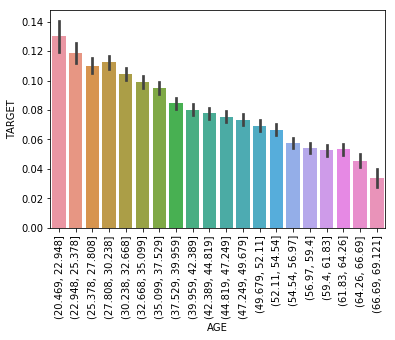

In [57]:
import seaborn as sns
px = age_group
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 90)

In [65]:
bin_age_value = [10,20,30,40,50,60,70]
age_group_cust= pd.cut(app_train['AGE'], bin_age_value)
age_group_cust.value_counts().sort_index()

(10, 20]        0
(20, 30]    45021
(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(60, 70]    35579
Name: AGE, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

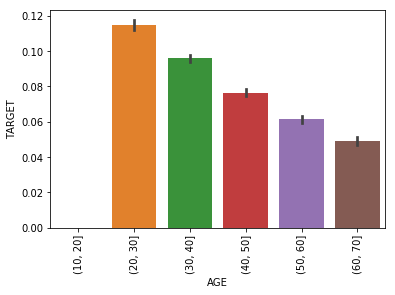

In [67]:
px = age_group_cust
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 90)